In [1]:
import clusim

import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')

In [2]:
print(clusim.available_similarity_measures)
row_format2 ="{:>25}" * (2)
row_format3 ="{:>25}" * (3)

['jaccard_index', 'rand_index', 'fowlkes_mallows_index', 'rogers_tanimoto_index', 'southwood_index', 'czekanowski_index', 'dice_index', 'sorensen_index', 'pearson_correlation', 'classification_error', 'purity_index', 'fmeasure', 'nmi', 'vi', 'geometric_accuracy', 'overlap_quality', 'onmi', 'omega_index']


In [11]:
c1 = clusim.make_random_clustering(n_elements = 10, n_clusters = 2)
c2 = clusim.make_random_clustering(n_elements = 10, n_clusters = 5)

clusim.print_clustering(c1)
clusim.print_clustering(c2)

for simfunc in clusim.available_similarity_measures:
    print(row_format2.format(simfunc, eval('clusim.' + simfunc+'(c1, c2)')))

0|1|23|4|56|7|8|9
01|2|3|4|56|97|8
            jaccard_index                     0.25
               rand_index       0.9333333333333333
    fowlkes_mallows_index       0.4082482904638631
    rogers_tanimoto_index                    0.875
          southwood_index       0.3333333333333333
        czekanowski_index                      0.4
               dice_index                      0.4
           sorensen_index                      0.4
      pearson_correlation    0.0035991140642303433
     classification_error      0.19999999999999996
             purity_index                      0.8
                 fmeasure                      0.4
                      nmi       0.8936897079186655
                       vi       0.5999999999999992
       geometric_accuracy       0.8485281374238571
          overlap_quality                     -0.0
                  nmi_lfk        0.839112692936409
              omega_index      0.36619718309859156


In [5]:
# Adjusted Rand Index
for rdm in clusim.available_random_models:
    print(row_format2.format(rdm, str(clusim.adjrand_index(c1, c2, random_model = rdm))))

                     perm        0.239864864864865
                    perm1        0.239864864864865
                      num        0.368404165916982
                     num1        0.315394343296465
                      all        0.254751867145135
                     all1        0.247435049702705


In [6]:
# Adjusted Mutual Information
for rdm in clusim.available_random_models:
    print(row_format2.format(rdm, str(clusim.adj_mi(c1, c2, random_model = rdm))))

                     perm         0.19519468076469
                    perm1         0.19519468076469
                      num        0.302485929095454
                     num1         0.25291951521311
                      all      -0.0429306690181899
                     all1       0.0740778076229609


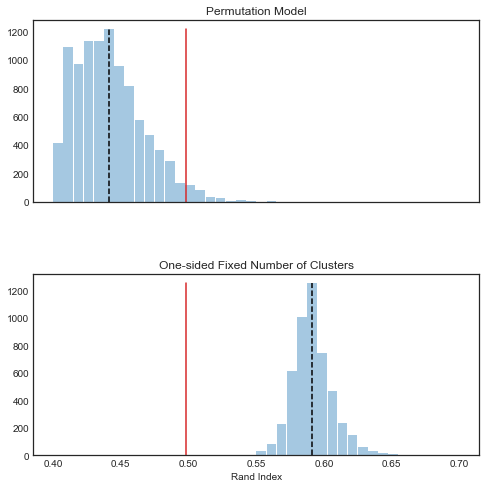

In [10]:
# An example sampling from a random distrubtion of clusterings

ground_truth = clusim.Clustering()
ground_truth.from_membership_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

detected_clustering = clusim.Clustering()
detected_clustering.from_membership_list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 3, 2, 1])

Nsamples = [100, int(100*99/2)]
model_list = ['perm', 'num1']
true_value = clusim.rand_index(detected_clustering, ground_truth)

fig, ax = plt.subplots(2,1, sharex = True, figsize = (8,8), gridspec_kw={'hspace':0.4})
bins = np.linspace(0.4, 0.7, 41)

titles = ['Permutation Model', 'One-sided Fixed Number of Clusters']
for iax in range(2):
    pairwise_comparisons = clusim.sample_expected_sim(detected_clustering, ground_truth, measure = 'rand_index', 
                                                       random_model = model_list[iax], 
                                                      nsamples = Nsamples[iax], keep_samples = True)

    rand_dist, bins = np.histogram(pairwise_comparisons, bins = bins)

    ax[iax].bar(0.5*(bins[:-1] + bins[1:]), rand_dist, width = 0.95*np.abs(bins[:-1] - bins[1:]), alpha = 0.4)
    
    exp_value = clusim.expected_rand_index(ground_truth.n_elements, random_model = model_list[iax], 
                                         n_clusters1 = detected_clustering.n_clusters, 
                                         n_clusters2 = ground_truth.n_clusters, 
                                         clu_size_seq1 = detected_clustering.clu_size_seq, 
                                         clu_size_seq2 = ground_truth.clu_size_seq)
    
    ax[iax].plot([exp_value,exp_value], [0, rand_dist.max()], c = 'k', ls = '--')

    ax[iax].plot([true_value,true_value], [0, rand_dist.max()], c = sns.color_palette()[3])
    ax[iax].set_title(titles[iax])
    
ax[1].set_xlabel('Rand Index')
plt.show()

In [9]:
# Element-centeric Clustering Similarity

# first consider the case of two partitions (no overlap or hierarchy)
clustering1 = clusim.Clustering(elm2clu_dict = {0:[0], 1:[0], 2:[1], 3:[1], 4:[2], 5:[2]})
clustering2 = clusim.Clustering(elm2clu_dict = {0:[0], 1:[1], 2:[1], 3:[1], 4:[1], 5:[2]})

clusim.print_clustering(clustering1)
clusim.print_clustering(clustering2)
print("Element-centric Similarity:", clusim.element_sim(clustering1, clustering2, alpha = 0.9) )
print("Element-centric Similarity for each element:")
elementScores, relabeled_elements = clusim.element_sim_elscore(clustering1, clustering2, alpha = 0.9) 
print(elementScores)

print()
# now lets conisder an example with overlap
clustering3 = clusim.Clustering(elm2clu_dict = {0:[0], 1:[0], 2:[0,1], 3:[1], 4:[2], 5:[2]})
clusim.print_clustering(clustering3)
print("Element-centric Similarity:", clusim.element_sim(clustering1, clustering3, alpha = 0.9))
print("Element-centric Similarity for each element:")
elementScores, relabeled_elements = clusim.element_sim_elscore(clustering1, clustering3, alpha = 0.9)
print(elementScores)

01|23|45
0|1234|5
Element-centric Similarity: 0.4166666666666667
Element-centric Similarity for each element:
[0.5  0.25 0.5  0.5  0.25 0.5 ]

012|23|45
Element-centric Similarity: 0.7017543859649121
Element-centric Similarity for each element:
[0.45614035 0.45614035 0.61403509 0.68421053 1.         1.        ]


In [5]:
c1_elm2clu_dict = {0:[0], 1:[1], 2:[1], 3:[0], 4:[2], 5:[1]}
c2_elm2clu_dict = {0:[0], 1:[1], 2:[1], 3:[0], 4:[2], 5:[2]}

c1 = clusim.Clustering(elm2clu_dict = c1_elm2clu_dict)
c2 = clusim.Clustering(elm2clu_dict = c2_elm2clu_dict)

N11, N10, N01, N00 = clusim.count_pairwise_cooccurence(c1, c2)
clusim.print_clustering(c1)
clusim.print_clustering(c2)
print(clusim.count_pairwise_cooccurence(c1, c2))

for simfunc in clusim.available_similarity_measures:
    print(simfunc + ':' + str(eval('clusim.' + simfunc+'(c1, c2)')))

03|125|4
03|12|45
(2.0, 2.0, 1.0, 10.0)
jaccard_index:0.4
rand_index:0.8
fowlkes_mallows_index:0.5773502691896258
rogers_tanimoto_index:0.6666666666666666
southwood_index:0.6666666666666666
czekanowski_index:0.5714285714285714
dice_index:0.5714285714285714
sorensen_index:0.5714285714285714
pearson_correlation:0.011363636363636364
classification_error:0.16666666666666674
purity_index:0.8333333333333333
fmeasure:0.5714285714285714
nmi:0.7396673768007593
vi:0.792481250360578
geometric_accuracy:0.8333333333333334
overlap_quality:-0.0
onmi:0.7449589906475155
omega_index:0.44444444444444453


In [10]:
for rdm in clusim.available_random_models:
    print(rdm + ':' + str(clusim.expected_rand_index(n_elements = 4, 
                                       n_clusters1 = 2, 
                                       n_clusters2 = 2, 
                                       clu_size_seq1 = [2,2], 
                                       clu_size_seq2 = [1,3],
                                       random_model = rdm) ) )

perm:0.5
perm1:0.5
num:0.510204081632653
num1:0.5
all:0.555555555555556
all1:0.5
